In [1]:
## 📘 analysis.ipynb (Notebook for exploration)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load dataset
df = pd.read_csv("c:\metadata.csv\metadata.csv")

C:\Users\user 1\AppData\Local\Temp\ipykernel_14536\2199689114.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("c:\metadata.csv\metadata.csv")


In [4]:
# Preview data
print(df.shape)
print(df.info())
print(df.head())

(1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null  

In [5]:
# Handle dates
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year

In [6]:
# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))


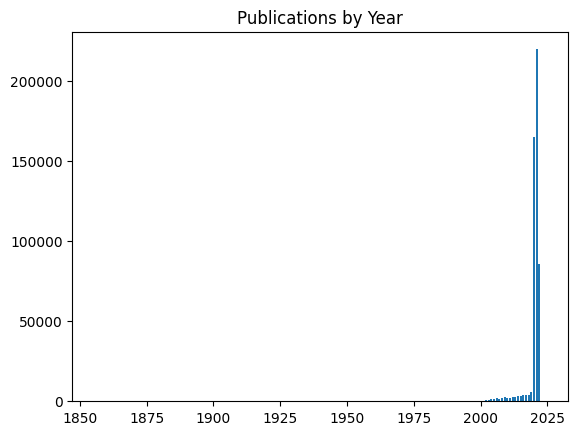

In [7]:
# --- Analysis ---
# Publications by year
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.show()

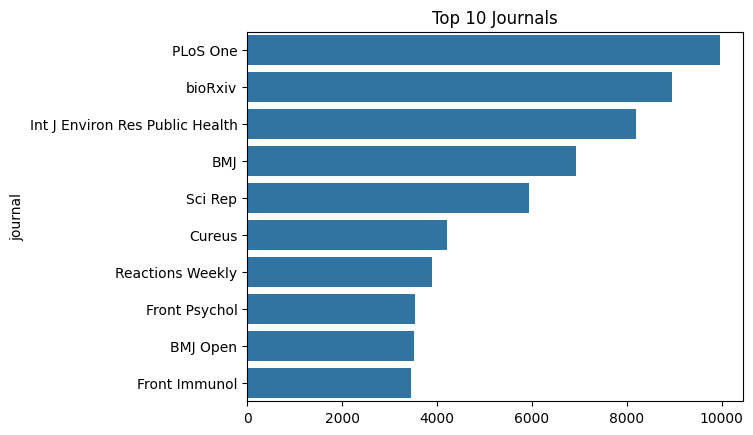

In [8]:
# Top journals
top_journals = df['journal'].value_counts().head(10)
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals")
plt.show()

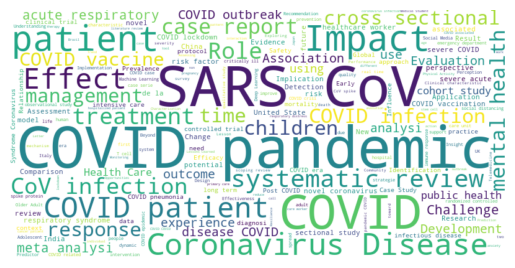

In [9]:
# Word cloud of titles
text = " ".join(df['title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()